In [7]:
%config Completer.use_jedi = False
import pandas as pd
df_func = pd.read_csv("function_metadata.csv")
df_seq = pd.read_csv("peptide_complete_no_shuff.txt", names=["peptides"])

<AxesSubplot:title={'center':'StarPep function histogram'}, ylabel='count'>

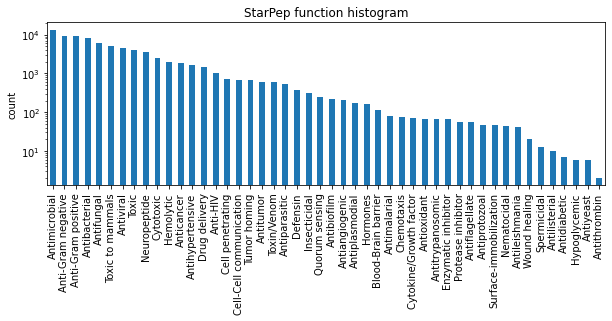

In [2]:
df_func['Metadata'].value_counts().plot(kind='bar', figsize=(10,3), logy=True, ylabel="count", title="StarPep function histogram")

In [96]:
df_func.tail(5)

,Peptide,Metadata
80786,starPep_45095,Cell penetrating
80787,starPep_45099,Anti-Gram positive
80788,starPep_45099,Toxic to mammals
80789,starPep_45099,Anticancer
80790,starPep_45099,Anti-Gram negative


In [20]:
df_seq.head(5)

,peptides
0,GIGAVLKVLTTGLPALISWIKRKRQQ
1,GIGKFLHSAKKFGKAFVGEIMNS
2,ILPWKWPWWPWRR
3,KWCFRVCYRGICYRRCR
4,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES


In [146]:
df_func_cols = pd.DataFrame()

for tag in df_func["Metadata"].unique(): #grab all the metadata tags
    df_type = df_func.loc[df_func["Metadata"] == tag]
    pep_ids = pd.to_numeric( df_type["Peptide"].str.lstrip("starPep_").values )
    temp_list = [0 for i in range (45100)] #longest length is 45099 see above...
    for i in pep_ids:
        temp_list[i] = 1
    df_func_cols.insert(len(df_func_cols.columns),tag,temp_list)

In [151]:
df_func_cols.insert(0,"Sequences",df_seq["peptides"])

In [152]:
df_func_cols.head(5)

,Sequences,Toxic to mammals,Antimicrobial,Anticancer,Cytotoxic,Anti-Gram negative,Antiparasitic,Drug delivery,Anti-HIV,Neuropeptide,...,Antiyeast,Quorum sensing,Antilisterial,Cytokine/Growth factor,Antihypertensive,Antidiabetic,Hypoglycemic,Tumor homing,Antiangiogenic,Antithrombin
0,GIGAVLKVLTTGLPALISWIKRKRQQ,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,GIGKFLHSAKKFGKAFVGEIMNS,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ILPWKWPWWPWRR,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,KWCFRVCYRGICYRRCR,1,1,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
df_func_cols.to_csv("sequence_function_link.csv")